Baseline Model for Warengruppe 4 Using linear Regression Ridge Regression model

based on IntroMLandLinReg.ipynb

Import Data and create dataframe, replace Nans with 0 and fit a linear regression model and give the resultig parameter.

In [16]:
%pip install statsmodels
# Import necessary libraries
import pandas as pd  # For data manipulation and handling
import statsmodels.formula.api as smf  # For statistical modeling
from datetime import datetime
import numpy as np

#Laden des merged_data.csv
merged_data_csv = "/workspaces/DS_ML_Gr_1.5/2_BaselineModel/merged_data_new.csv"
df_merged_data = pd.read_csv(merged_data_csv)

# Fehlende Werte (NaN) durch 0 ersetzen
df_merged_data = df_merged_data.replace(to_replace=r'NaN', value='0', regex=True)
df_merged_data = df_merged_data.replace(to_replace=r'^-$', value='0', regex=True)
df_filled = df_merged_data.fillna(0)


#Bennenung der Warengruppne für dataframe Namen
warengruppe_namen = {
    1: 'Brot',
    2: 'Broetchen',
    3: 'Crossaint',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Ursprüngliche DataFrames filtern nach Warengruppe
warengruppe_dataframes = {}
for i, name in warengruppe_namen.items():
    var_name = f"df_{name}_W{i}"  # Name erstellen nach: df_Brot_W1
    warengruppe_dataframes[var_name] = df_filled[
        (df_filled['Warengruppe'] == i) &
        (df_filled['Datum'] <= '2018-07-31')
    ]

# Daten bis 2019-07-31 unabhängig der Warengruppe hinzufügen
new_data = df_filled[
    (df_filled['Datum'] > '2018-07-31') &
    (df_filled['Datum'] <= '2019-08-31')
]

for var_name, df in warengruppe_dataframes.items():
    updated_df = pd.concat([df, new_data], ignore_index=True)
    globals()[var_name] = updated_df

data=df_Konditorei_W4
print(data.tail())

# Fit a linear regression model
# - 'Umsatz' is the dependent variable (target) we aim to predict.
# - 'Temperatur' Continious feature
# - 'C(Wochentag)' treats the 'Wochentag' feature as a categorical variable.

mod = smf.ols('Umsatz ~ Inflationsrate+C(Heimspiel)+C(Weihnachtsmarkt)+C(Markt)+Faehrverkaehr+Kreuzfahrverkehr+Temperatur+C(Monat)+ C(Frühling)+C(Sommer)+C(Herbst)+C(Winter)+C(Temp_warm)+C(Temp_cold)+C(Temp_average)+ C(Monday)+C(Tuesday)+C(Wednesday)+C(Thursday)+C(Friday)+C(Saturday)+C(Sunday)+C(Schulferien)+C(Semesterferien)+C(Feiertage)+Niederschlag+Schneehoehe+Sonnenschein+C(Werktag)', data=df_filled).fit()

# Output the summary of the fitted model
# The summary includes key metrics such as R-squared, coefficients, and p-values.
print(mod.summary())



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
           Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
2126  2019-07-27            1.43        1.0              0.0    0.0   
2127  2019-07-28            1.43        0.0              0.0    0.0   
2128  2019-07-29            1.43        0.0              0.0    0.0   
2129  2019-07-30            1.43        0.0              0.0    0.0   
2130  2019-07-31            1.43        0.0              0.0    0.0   

     Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  \
2126             0               0.0     23.5375      7     Sommer  ...   
2127             0               0.0     23.3500      7     Sommer  ...   
2128             0               0.0     25.2500      7     Sommer  ...   
2129             0               0.0     20.7375      7     Sommer  ...   
2130             0   

This script builds and evaluates a multiple linear regression model to the target variable
based on selected features.
The dataset is scaled, split into training and testing sets, and visualized using error analysis plots.

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     33.20
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           1.23e-72
Time:                        16:19:20   Log-Likelihood:                -6905.1
No. Observations:                1409   AIC:                         1.384e+04
Df Residuals:                    1395   BIC:                         1.391e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             125.3857      3.472     

/tmp/ipykernel_25171/3993236019.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


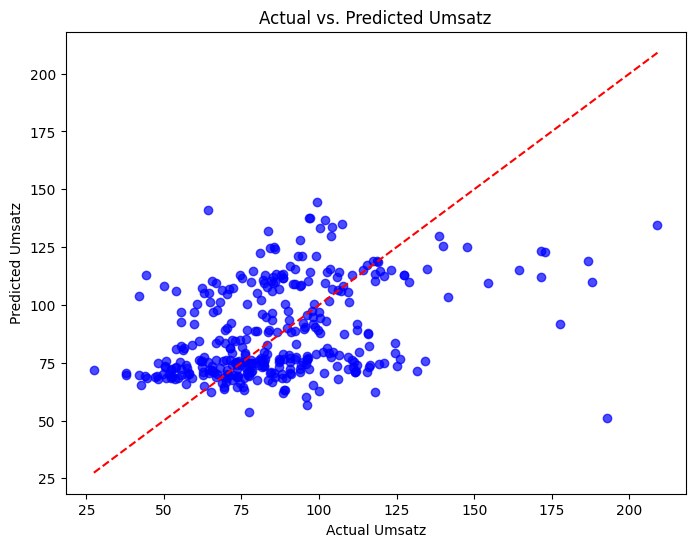

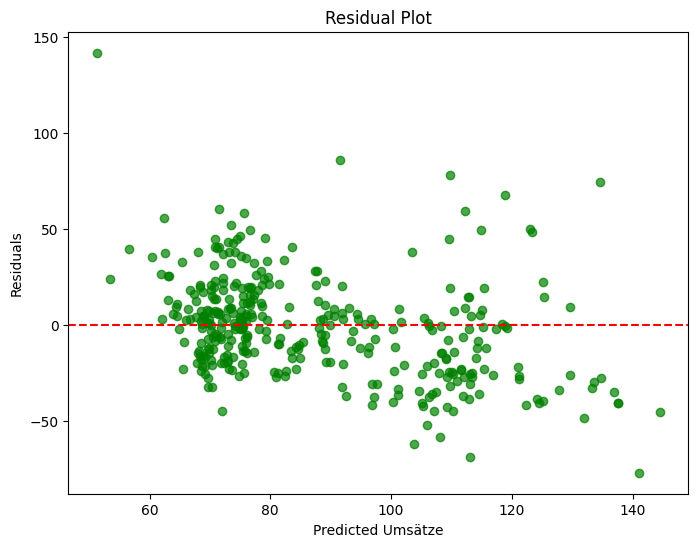

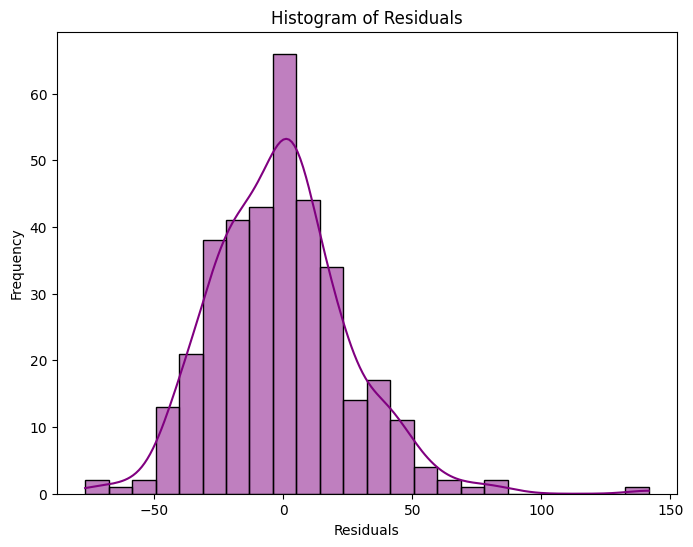

/tmp/ipykernel_25171/3993236019.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")


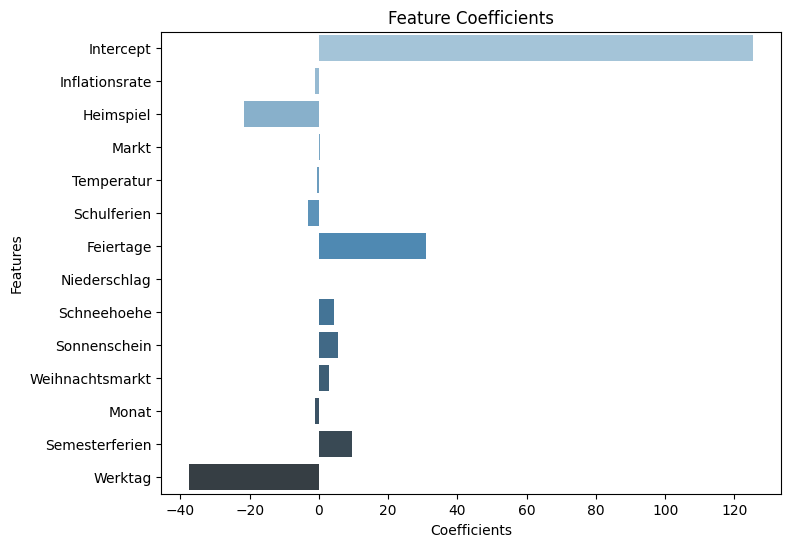

In [17]:
nto train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations

# Load the dataset # Import necessary libraries
import pandas as pd  # Data manipulation and handling
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data i

data=data

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Inflationsrate','Heimspiel','Markt', 'Temperatur', 'Schulferien',
            'Feiertage', 'Niederschlag','Schneehoehe','Sonnenschein','Weihnachtsmarkt','Monat','Semesterferien','Werktag']
X = data[features] #target variable: Umsatz
y=data['Umsatz']

# Scale the feature data to standardize the range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']


# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(X_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)  # Add constant to test set for predictions
predictions = model.predict(X_test.astype(float))
print("Predictions for test data:", predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_test - predictions) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Scatter plot: Actual vs. Predicted Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsatz")
plt.ylabel("Predicted Umsatz")
plt.title("Actual vs. Predicted Umsatz")
plt.show()

# Calculate residuals (differences between actual and predicted Umsätze)
residuals = y_test - predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

This script uses a Stochastic Gradient Descent (SGD) regressor to the taget variable
based on selected features.
The dataset is split into training and testing sets, and the model is evaluated using various
error metrics and visualizations.

/tmp/ipykernel_25171/2807448878.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


Predictions for test data: [76.3781775  76.4901046  76.39373073 76.50155044 84.43854   ]
Mean Absolute Error (MAE): 18.75
Mean Squared Error (MSE): 623.31
Mean Absolute Percentage Error (MAPE): 23.51%


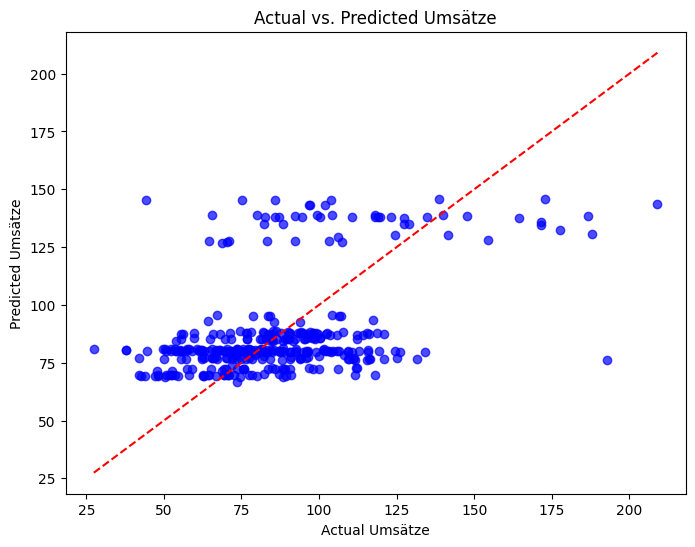

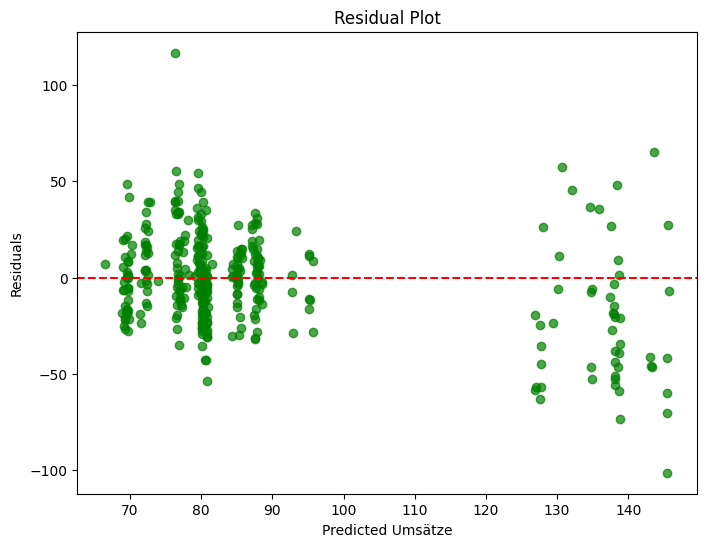

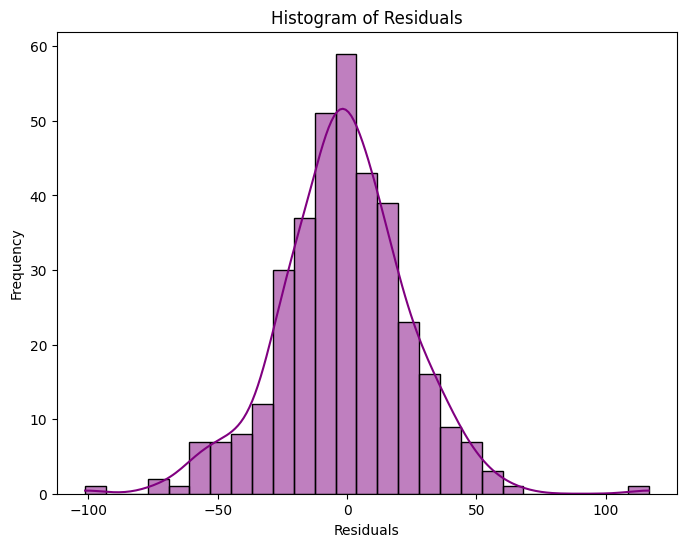

/tmp/ipykernel_25171/2807448878.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")


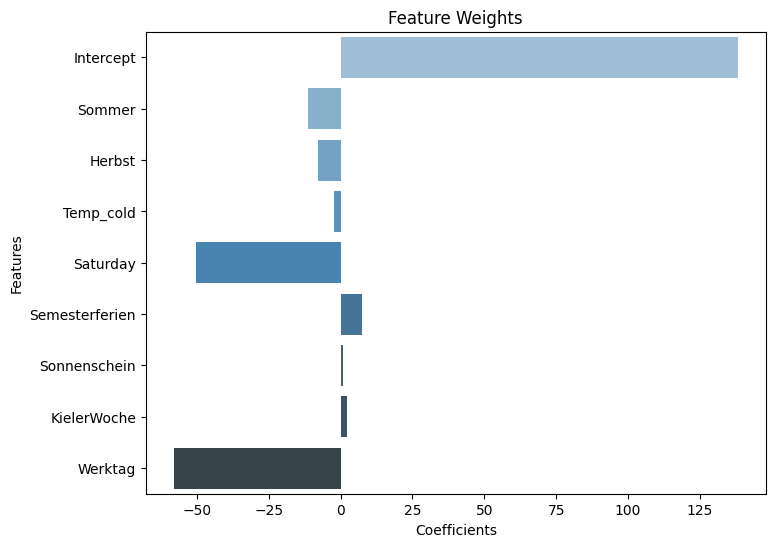

In [18]:
# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

# Load the dataset 
data=data

# Select features and target variable
features = ['Sommer','Herbst','Temp_cold','Saturday','Semesterferien','Sonnenschein','KielerWoche','Werktag']
X = data[features] #target variable: Umsatz
y=data['Umsatz']

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']

# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

# Calculate error metrics
mae = mean_absolute_error(y_test, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, sgd_predictions)  # Mean Squared Error
mape = (abs((y_test - sgd_predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsätze")
plt.ylabel("Predicted Umsätze")
plt.title("Actual vs. Predicted Umsätze")
plt.show()

# Calculate residuals (differences between actual and predicted values)
residuals = y_test - sgd_predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(sgd_predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Extract and display model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': [sgd_model.intercept_[0]] + list(sgd_model.coef_)
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")
plt.title("Feature Weights")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()


This script demonstrates the use of Ridge Regression, a regularized linear regression technique,
to predict house prices. Hyperparameter tuning is performed using GridSearchCV to optimize the
regularization parameter (alpha) for minimizing the Mean Absolute Error (MAE).

In [19]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and hyperparameter tuning
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics

# Load the dataset 
data=data

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Inflationsrate','Heimspiel','Markt', 'Temperatur', 'Schulferien','Sommer','Herbst','Temp_cold','Saturday','KielerWoche',
            'Feiertage', 'Niederschlag','Schneehoehe','Sonnenschein','Weihnachtsmarkt','Monat','Semesterferien','Werktag']
X = data[features] #target variable: Umsatz
y=data['Umsatz']

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'
test_end_date='2019-07-30'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[(data['Datum'] > validation_end_date) & (data['Datum'] <= test_end_date)]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_validation = validation_data[features]
y_validation = validation_data['Umsatz']
X_test = test_data[features] 
y_test = test_data['Umsatz']

# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Testing a range of regularization strengths
}

# Create a GridSearchCV object for hyperparameter tuning
# - cv=5: 5-fold cross-validation
# - scoring='neg_mean_absolute_error': Metric for selecting the best model (negative MAE)
# - verbose=1: Display progress during grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Train Ridge Regression model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, predictions)  # Mean Squared Error
mape = (abs((y_test - predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(predictions)
#sample=pd.read_csv('sample_submission.csv')
#sample['Umsatz']=sample['Umsatz'].replace(predictions.iloc[:,0])

#sample.to_csv=('predictions.csv',index==False)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'alpha': 10}
Mean Absolute Error (MAE): 86.07
Mean Squared Error (MSE): 7856.12
Mean Absolute Percentage Error (MAPE): inf%
[ 70.62658717  69.64490544  68.30467697  77.47633975 125.92551505
  72.51080102  63.39658343  65.18811381  69.81016632  75.6503183
  78.06599696 129.05143893  69.75097611  71.0981441   70.38522511
  69.27770171  73.72897961  81.44751785 127.00518229  74.56938845
  77.19436501  71.32545528  72.54645416  77.88648253  79.99430209
 134.80708725  77.47735368  76.2905733   74.2237543   69.95741319
  77.69164749  86.40365086 131.60501074  73.99987492  74.87142249
  74.92434797  74.88683985  74.9318577  101.76131442 147.75801107
  73.47726279  75.64171353  77.11355419  77.82113798  76.61236007
 101.96818979 148.65782485  95.40245136  96.23955382  94.77806643
  92.76070362  78.46928987  91.3781125  135.19269529  84.40596079
  82.38310898  77.96303154  74.57769025  83.41615709  89.16675029
 1

In [20]:
#Datum zu predicted Umsatzdaten hinzufügen
import numpy as np

# Startdatum von test_data angeben
startdatum = np.datetime64('2018-08-01')

# Erstelle ein Array von Datumsangaben entsprechend der Länge der Umsatzdaten
datum_array = np.arange(startdatum, startdatum + len(predictions))

# Konvertiere das Datumsarray zu Strings
datum_array_str = datum_array.astype(str)

# Integriere Datum und Umsatzdaten in ein gemeinsames Array
date_prediction = np.column_stack((datum_array_str, predictions))

#print(date_prediction)

# Konvertiere das Array zu einem Pandas DataFrame
df_predictions = pd.DataFrame(date_prediction, columns=["Datum", "Umsatz"])


# Optional: Umsatzdaten zurück zu numerischen Typen konvertieren
df_predictions["Umsatz"] = pd.to_numeric(df_predictions["Umsatz"])

#Hi Wiebke, um das Problem schnell zu lösen, ersetzte ich die Werte jetzt mit Nullen. Kannst du gerne wieder löschen, wenn du das Problem gelöst hast :)
df_predictions = df_predictions.fillna(0)


print(df_predictions)

          Datum      Umsatz
0    2018-08-01   70.626587
1    2018-08-02   69.644905
2    2018-08-03   68.304677
3    2018-08-04   77.476340
4    2018-08-05  125.925515
..          ...         ...
359  2019-07-26   65.976331
360  2019-07-27   78.961971
361  2019-07-28  124.316485
362  2019-07-29   67.939288
363  2019-07-30   72.728961

[364 rows x 2 columns]


In [21]:
#Mergen der Umsatzdaten mit test_csv

# CSV-Datei mit Warengruppe 1 einlesen
df_test_csv = pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/test.csv")

# Filtern der Zeilen für Warengruppe 1
warengruppe4_df = df_test_csv[df_test_csv["Warengruppe"] == 4].copy() #Bitte Warengruppenummer ändern!

# Merge der DataFrames mit Left Join auf die Spalte 'Datum'
W_df_merged = pd.merge(warengruppe4_df, df_predictions, on="Datum", how="left")

# Ergebnis als neue CSV-Datei speichern
W_df_merged.to_csv("/workspaces/DS_ML_Gr_1.5/2_BaselineModel/W4_Konditorei_ID.csv", index=False)

# Ergebnis anzeigen
print(W_df_merged)

          id       Datum  Warengruppe      Umsatz
0    1808014  2018-08-01            4   70.626587
1    1808024  2018-08-02            4   69.644905
2    1808034  2018-08-03            4   68.304677
3    1808044  2018-08-04            4   77.476340
4    1808054  2018-08-05            4  125.925515
..       ...         ...          ...         ...
349  1907264  2019-07-26            4   65.976331
350  1907274  2019-07-27            4   78.961971
351  1907284  2019-07-28            4  124.316485
352  1907294  2019-07-29            4   67.939288
353  1907304  2019-07-30            4   72.728961

[354 rows x 4 columns]
